In [77]:
#!pip install nltk
#!pip install autocorrect
#!pip install scikit-learn

# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [42]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [7]:
data=pd.read_csv(r'D:\Python37\Projects\TextClassification-master\data.csv',encoding='ISO-8859-1')

In [9]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [18]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

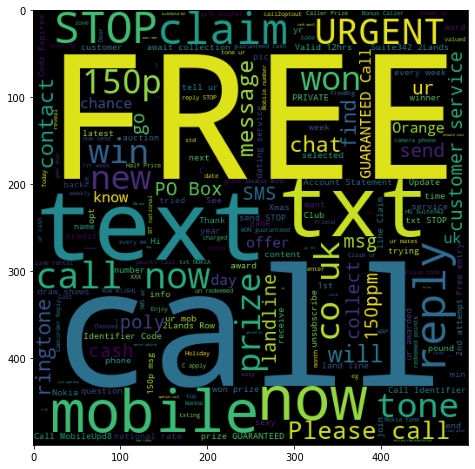

In [23]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

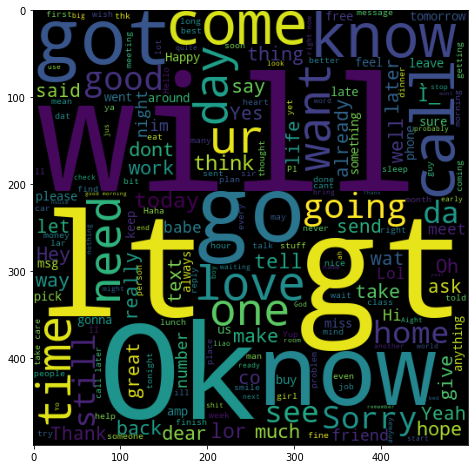

In [24]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [34]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
data.shape

(5572, 2)

In [54]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [50]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [11:06<00:00,  8.36it/s]


In [53]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [60]:
len(new_data)

5572

In [57]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [83]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [72]:
X_train

['win really side long time',
 'see christmas',
 'pleas call immer urgent message wait',
 'weekly cool mob tone read download week new tone include crazy frog axe f anon lone black eye dont p info n',
 'dizzamn right ask suite get back',
 'spoon mob halloween collect logo pic message pl free peri tone txt card spoon zed p per logo pic',
 'smile pleasure smile pain smile trouble pour like rain smile sum hurt u smile below someone still love see u smile',
 'pm cost p',
 'dunno dat wat told ok lor',
 'drop em mw back',
 'sunshine quiz wki q win top song dvd player u know country altar txt ans sp tron',
 'u go phone gon na die stay',
 'key done home dress co lay around ill speak later bout time stuff',
 'thx dude u guy site',
 'plan family set stone',
 'free ringen wait collect simply text password mix verify get usher britney ml',
 'men like shorter laid gaze eye',
 'dear take care reach home love u lot',
 'rat hey u ever vote next theme',
 'xy go e lunch',
 'plan',
 'great aunt anniversa

In [73]:
X_test

['free day sex st george day pic jordan txt pic dont miss every wk sauce celeb pic c pocketbab co uk wk',
 'dear call tomorrow pl accord',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'miya last night naughty bought cloth little read shop tho kind time wan na meet',
 'sound good finger make difficult type',
 'good afternoon sex bun go job search wake first thought away love wish fine happy know adr',
 'lick every drop read use mouth well',
 'ok take ur time n enjoy ur dinner',
 'send text style later',
 'new theory argument win stat lose person dont argue ur friend kick amp say away correct',
 'ok pop ask bout some said around tonight wen girl come',
 'hold',
 'ok anyway need chang said',
 'symptom u love u like listen song u get stop u see name below u get angry',
 'time come tomorrow',
 'today accept day u accept brother sister lover dear best col lvblefrnd jstfrnd cutefrnd lifpartnr beloved sweetheart bstfrnd reli mean enemy

In [64]:
Y_train

485     0
4387    0
4295    1
4750    1
3991    0
       ..
2677    0
5503    0
3718    1
1553    0
1517    1
Name: labels, Length: 4179, dtype: int64

In [65]:
Y_test

1349    1
131     0
1162    1
4540    0
1537    0
       ..
3786    0
5283    0
1239    0
4926    0
919     0
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [70]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [71]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
Y_train

485     0
4387    0
4295    1
4750    1
3991    0
       ..
2677    0
5503    0
3718    1
1553    0
1517    1
Name: labels, Length: 4179, dtype: int64

In [76]:
Y_test

1349    1
131     0
1162    1
4540    0
1537    0
       ..
3786    0
5283    0
1239    0
4926    0
919     0
Name: labels, Length: 1393, dtype: int64

# Lets train our Model - Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [81]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [84]:
model.classes_

array([0, 1], dtype=int64)

In [87]:
Y_pred=model.predict(X_test_vect)

In [88]:
Y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [91]:
accuracy_score(Y_test,Y_pred) * 100

85.92964824120602

In [92]:
confusion_matrix(Y_test,Y_pred)

array([[1057,  166],
       [  30,  140]], dtype=int64)